In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

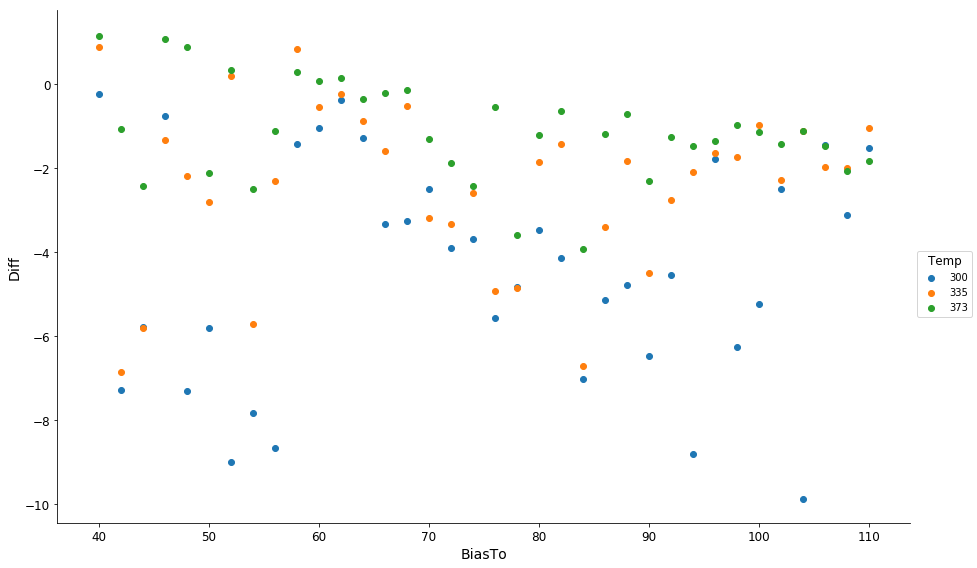

In [12]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/third_start_extended/rerun_0_08_May_135309.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun0 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

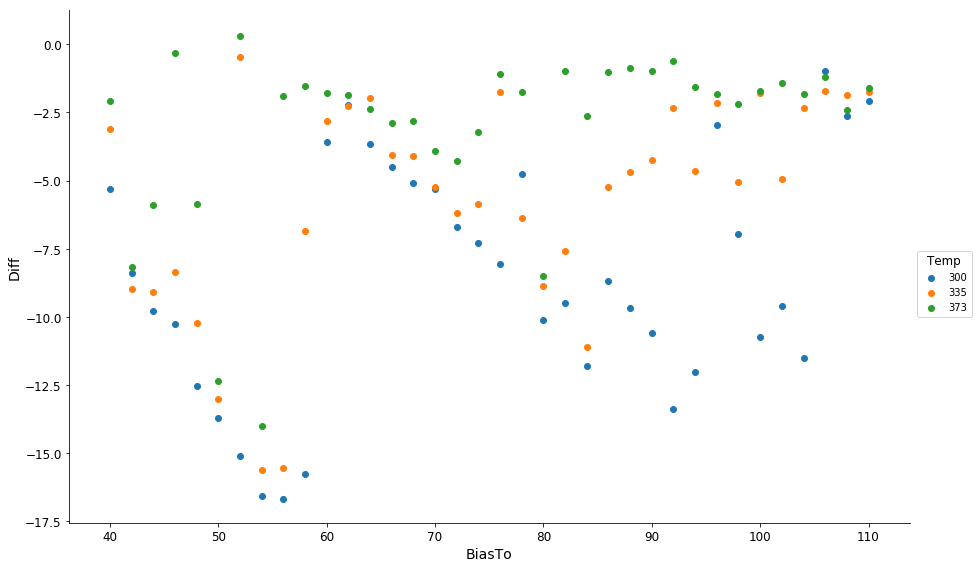

In [2]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/third_start_extended/rerun_1_08_May_135309.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

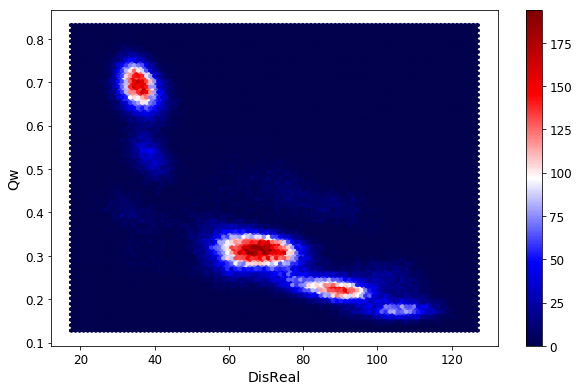

In [3]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

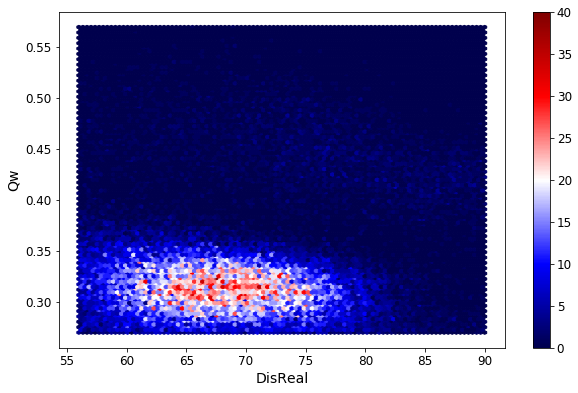

In [22]:
rerun1.query("Temp == 300 and DisReal > 56 and DisReal < 90 and Qw > 0.27").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [27]:
t.columns

Index(['Step', 'Run', 'Temp', 'Qw', 'Energy', 'DisReal', 'Dis_h56',
       'z_average', 'abs_z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5',
       'z_h6', 'Distance', 'AMH-Go', 'Membrane', 'Rg', 'rg1', 'rg2', 'rg3',
       'rg4', 'rg5', 'rg6', 'rg_all', 'Lipid', 'Lipid1', 'Lipid2', 'Lipid3',
       'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9', 'Lipid10',
       'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'TotalE',
       'BiasTo'],
      dtype='object')

Step            -443576.359302
Run                  -0.589726
Temp                  0.000000
Qw                   -0.120168
Energy               -0.339266
DisReal              -8.222445
Dis_h56             -34.729154
z_average             2.642047
abs_z_average        -2.287249
z_h1                 -0.202098
z_h2                 -0.072830
z_h3                 -2.187568
z_h4                  1.365513
z_h5                  6.646713
z_h6                 15.572685
Distance             -3.473573
AMH-Go                6.314025
Membrane              0.028986
Rg                    0.947766
rg1                  -0.027632
rg2                  -0.183648
rg3                   0.572963
rg4                   0.272200
rg5                  -0.807617
rg6                   1.121500
rg_all                0.947766
Lipid                -1.225205
Lipid1               -0.051997
Lipid2               -0.252897
Lipid3               -0.528584
Lipid4               -0.387880
Lipid5                0.001863
Lipid6  

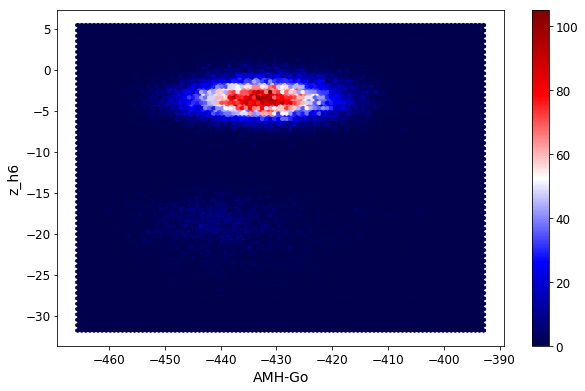

In [29]:
t = rerun1.query("Temp == 300 and DisReal > 56 and DisReal < 90 and Qw > 0.27")
t.plot.hexbin("AMH-Go", "z_h6", cmap="seismic", sharex=False)
a = t.query("z_h6 > -10").mean()
b = t.query("z_h6 < -10").mean()
print(a-b)

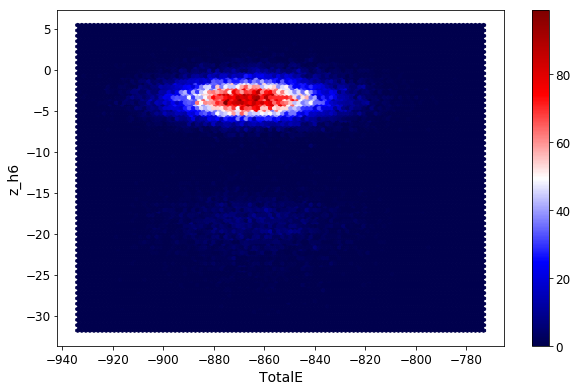

In [25]:
t = rerun1.query("Temp == 300 and DisReal > 56 and DisReal < 90 and Qw > 0.27")
t.plot.hexbin("TotalE", "z_h6", cmap="seismic", sharex=False)

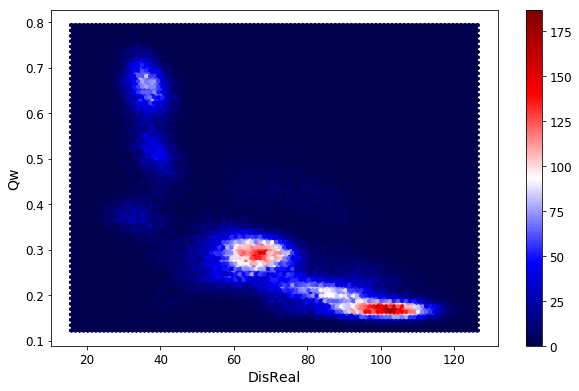

In [15]:
rerun1.query("Temp == 335").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [9]:
t = rerun1.query("Temp == 300 and Qw < 0.4 and DisReal < 80")

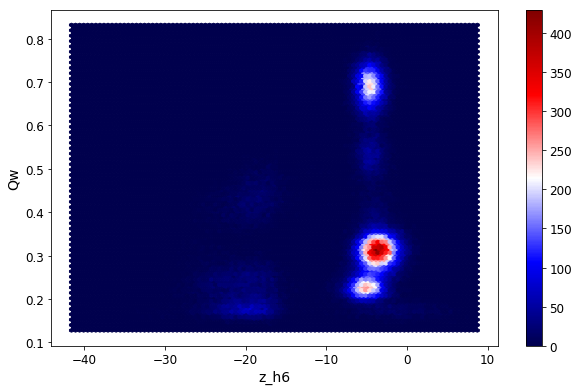

In [4]:
rerun1.query("Temp == 300").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

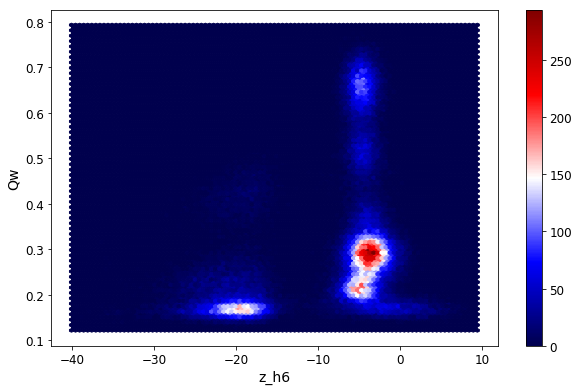

In [16]:
rerun1.query("Temp == 335").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

In [10]:
select(t)

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
100.0  0     140.0  77.638023  2.102907  70.064614  76.549868  78.140354   
40.0   0     696.0  36.721442  5.268517  22.636904  33.078220  36.486358   
       4     257.0  39.425582  5.166328  26.928944  35.986001  39.201468   
48.0   0     110.0  38.259758  4.422310  28.273493  34.130513  38.870564   
       2     104.0  35.746436  4.693225  25.589496  32.567011  35.203911   
58.0   2     222.0  57.621016  4.509114  42.580661  54.764789  57.448789   
       3     197.0  54.410569  4.903806  44.095056  51.172661  53.888780   
60.0   2    1250.0  57.821798  4.945598  37.362910  54.527483  57.837821   
       5    1022.0  57.948066  5.064220  43.747092  54.646531  58.194757   
62.0   0    1120.0  60.777878  5.156081  43.683879  57.139877  60.591997   
       1     666.0  59.724416  4.424158  45.583116  56.863318  59.674718   
       5     714.0  58.223686  4.740176  45.122072  55.016443  58.296933   
64.0   1    1593.0  60.256029  4.459491  43.921829  57.375562  60.286550   
       6     190.0  59.461932  5.338773  42.448686  55.112690  60.187071   
66.0   0    1399.0  61.787667  4.525556  46.481616  58.735167  61.700282   
       1    1053.0  61.157041  4.589287  45.840048  58.247206  61.189981   
68.0   0    1904.0  62.957736  4.548431  49.302721  59.845373  63.020281   
       4     580.0  63.088282  4.129281  51.254876  60.232054  63.066447   
70.0   1     880.0  64.627862  4.236011  48.994784  61.881513  64.475377   
       3    1536.0  64.811206  4.262628  50.306454  62.041912  64.899240   
72.0   1     735.0  65.152919  4.519872  47.681164  62.184923  65.262551   
       6    1684.0  65.311742  4.163035  52.403950  62.433600  65.229433   
74.0   1     297.0  66.953725  4.323465  51.910962  64.431896  67.261422   
       3     642.0  67.016694  4.323066  53.737000  64.254280  67.004368   
       4    1554.0  66.467835  4.031546  48.393468  63.825734  66.533342   
76.0   4    2461.0  67.850843  4.082519  51.087804  65.186266  67.926620   
78.0   2     827.0  69.353277  3.977169  55.070983  66.624268  69.413342   
       3     105.0  74.720756  3.327731  65.527736  72.613166  74.871843   
80.0   1    1106.0  69.679036  3.926779  57.031961  66.977523  69.666211   
       2     212.0  69.954309  4.119973  58.496381  67.240693  69.986737   
       3    1175.0  69.998119  3.976090  56.901222  67.268696  70.286923   
82.0   0    1748.0  71.663968  4.109984  53.132581  68.989481  71.817991   
       1     611.0  72.581277  3.901785  59.695680  69.956218  72.756688   
84.0   0     327.0  72.109356  3.591297  59.717985  69.725924  72.266312   
       1    2113.0  71.929132  3.657964  59.128395  69.389412  72.019296   
86.0   2    1171.0  74.241344  3.690276  62.116188  71.716774  74.662894   
       5     491.0  74.610841  3.571127  62.885576  72.474050  75.191503   
88.0   1    1533.0  73.966695  3.353404  63.608180  71.680165  74.145016   
90.0   2    1360.0  75.358643  3.138977  61.976665  73.404652  75.861740   
92.0   0    1604.0  75.461673  2.981435  63.113473  73.582608  75.789082   
94.0   2     147.0  77.583196  1.834235  70.612739  76.564662  77.918311   
       5     931.0  75.633365  2.911715  64.393110  73.716075  76.027090   

                  75%        max  
BiasTo Run                        
100.0  0    79.361161  79.988150  
40.0   0    40.455056  55.805894  
       4    42.279973  53.453771  
48.0   0    41.857001  47.056583  
       2    38.607598  48.731568  
58.0   2    61.174592  67.854838  
       3    57.876820  66.837884  
60.0   2    61.178785  72.945176  
       5    61.534074  73.687199  
62.0   0    64.232247  75.133559  
       1    62.423052  74.397717  
       5    61.545970  72.528859  
64.0   1    63.253306  72.658487  
       6    63.250225  73.548462  
66.0   0    64.740959  76.579467  
       1    64.191761  74.617839  
68.0   0    66.025340  76.732403  
   

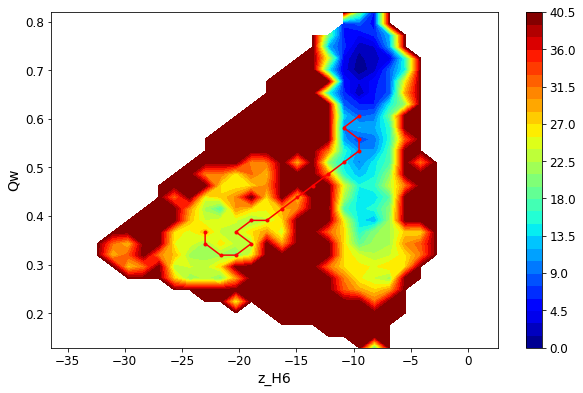

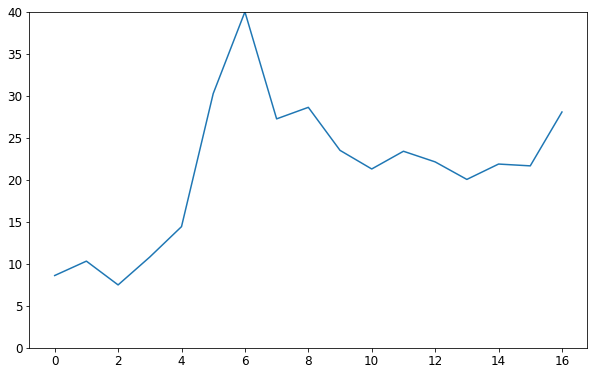

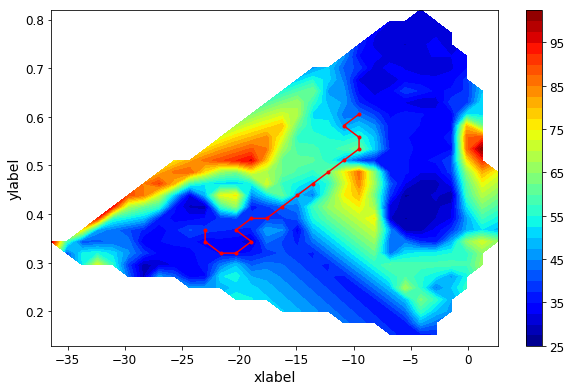

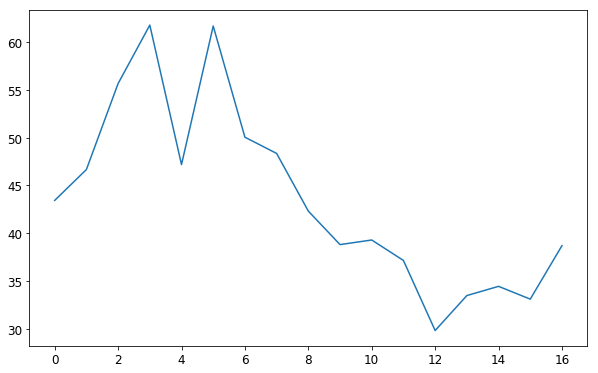

In [37]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 260
location = pre + "/thrid_start_extended/_280-350/2d_z_qw/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 10), end=(20,20),save=False, xlabel="z_H6", ylabel="Qw", zmax=40,res=30)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

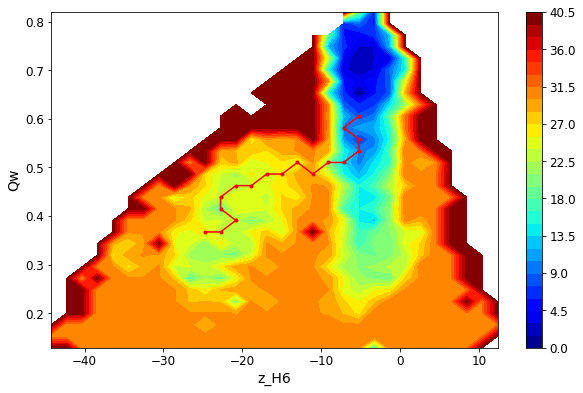

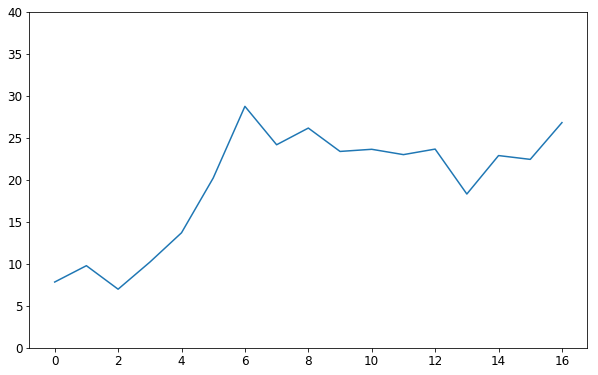

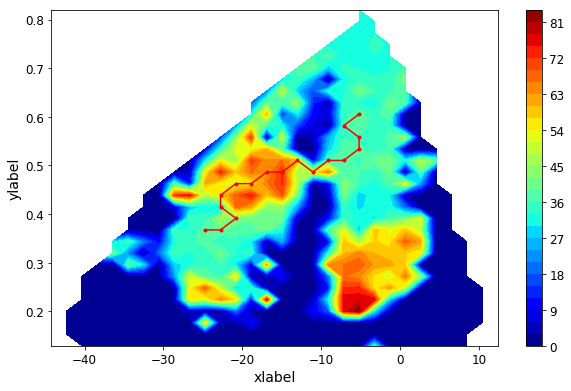

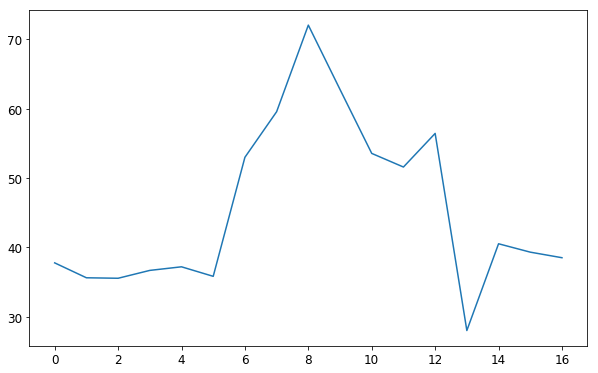

In [36]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 260
location = pre + "/thrid_start_extended/_280-350/2d_z_qw/force_0.1/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 10), end=(20,20),save=False, xlabel="z_H6", ylabel="Qw", zmax=40,res=30)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

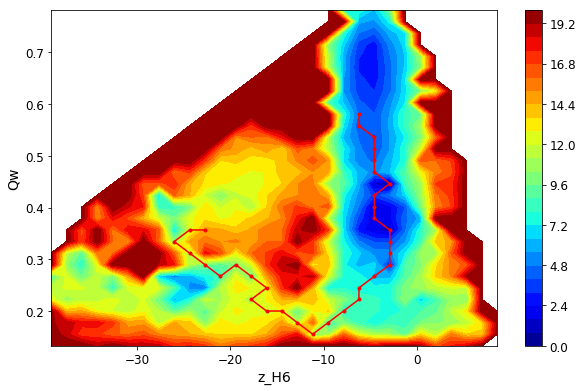

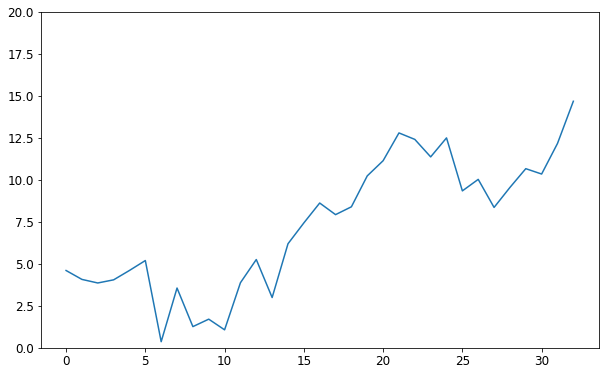

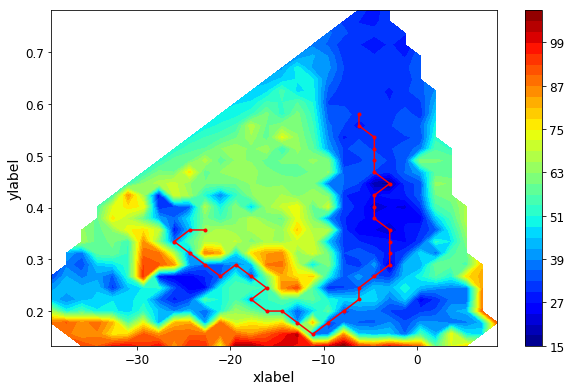

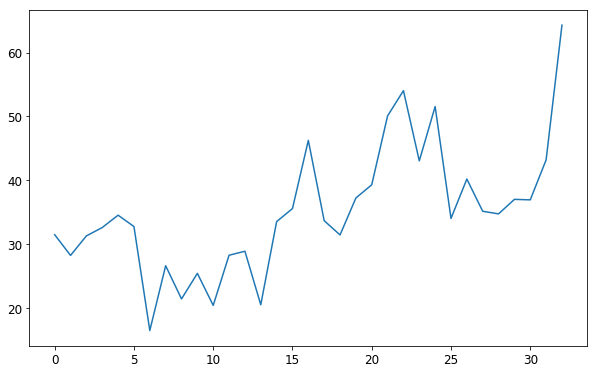

In [31]:
pre = "/Users/weilu/Research/server/may_2018/01_week"
temp = 335
location = pre + "/thrid_start_extended/_280-350/2d_z_qw/quick/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(10, 10), end=(20,20),save=False, xlabel="z_H6", ylabel="Qw", zmax=20,res=30)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)